In [1]:
#Muhammad Roshan Mughees - 193590
#Muhammad Rizwan Khalid - 180459


from PIL import Image
import numpy as np
import PIL

In [152]:
#convert to 8 bit grayscale
image_file = Image.open('Lab4-image.png').convert('L')
image_file.show()

In [153]:
#convert it to 2 bit grayscale
import itertools
img = Image.new( image_file.mode, image_file.size)
pixelsNew = img.load()
for x,y in itertools.product(range(0,image_file.size[0]),range(0,image_file.size[1])):
    color = image_file.getpixel((x,y))
    if color>=125:
        pixelsNew[(x, y)]= 255
    else: 
        pixelsNew[(x, y)] = 0
img.show()
img.save('greyscale.png')

In [181]:
#convert grayscale image to numpy array
I = np.asarray(PIL.Image.open('greyscale.png'))

In [182]:
#adding strides i.e., extra row and column
row = np.full(np.size(I,1), 255, dtype=int)
I = np.insert(I, 0, row, 0)
col = np.full(np.size(I,0), 255, dtype=int)
I = np.insert(I, 0, col, 1)
print I

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [183]:
#a = np.zeros((20, 2000))
#row = np.full(np.size(a,1), 255, dtype=int)
#a = np.insert(a, 0, row, 0)
#col = np.full(np.size(a,0), 255, dtype=int)
#a = np.insert(a, 0, col, 1)
#print a
I.shape[0]

332L

In [184]:
#making new matrix with these values
count = 100
dic = dict()
result= np.zeros((I.shape[0]-1,I.shape[1]-1))
for rowt in range(I.shape[0] - 1):
    for colt in range(I.shape[1] - 1):
        Row = rowt +1
        Col = colt+1
        if I[Row][Col] == 255:
            result[Row-1][Col-1] = 0
        elif result[Row-2][Col-2] == 0 and result[Row-1][Col-2] == 0:
            result[Row-1][Col-1] = count
            count += 1
            continue
        elif result[Row-2][Col-2] == 0:
            result[Row-1][Col-1] = result[Row-1][Col-2]
        elif result[Row-1][Col-2] == 0:
            result[Row-1][Col-1] = result[Row-2][Col-1]
        else:
            result[Row-1][Col-1] = min(result[Row-1][Col-2],result[Row-2][Col-2])
            if result[Row-1][Col-2] != result[Row-2][Col-2]:
                dic[int(max(result[Row-1][Col-2],result[Row-2][Col-2]))] = int(min(result[Row-1][Col-2],result[Row-2][Col-2]))

In [185]:
result.shape

(331L, 508L)

In [189]:
##converting numpy array to image for seeing results
im = PIL.Image.fromarray(np.array(result))
im.show()

In [190]:
#second iteration           
for key in reversed(list(dic.keys())):
    result[result == key]= dic[key]
im = PIL.Image.fromarray(np.array(result))
im.show()

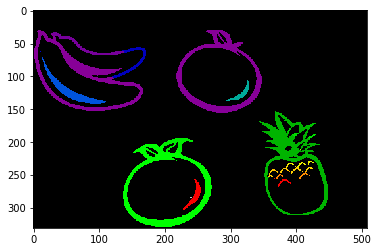

In [192]:
#applying coloring filter to see the results
import matplotlib.pyplot as plt

f = plt.figure()
plt.imshow(result,cmap="nipy_spectral")
plt.show()

In [193]:
## End